In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive #this is the command which is used to import documents from google drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path ='/content/drive/MyDrive/DS - Assignment Part 1 data set.xlsx'
df=pd.read_excel(path)
df.describe

<bound method NDFrame.describe of      Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience st

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


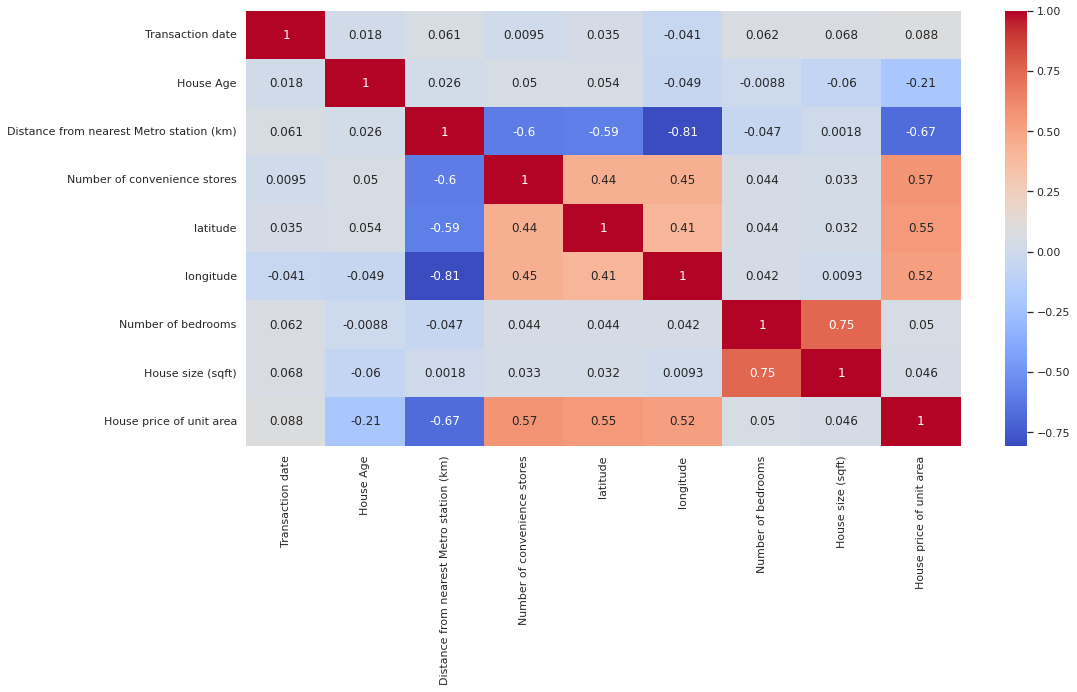

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["House price of unit area"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Distance from nearest Metro station (km)    0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

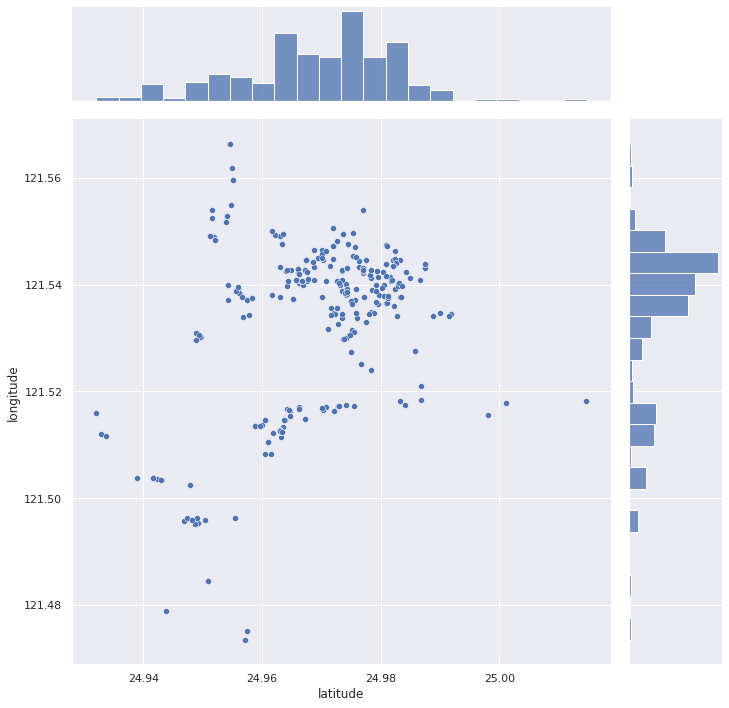

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
#The common location and how the houses are placed
plt.figure(figsize=(10,10))
sns.jointplot(x=df.latitude,y=df.longitude,size=10)
plt.ylabel('longitude',fontsize=12)
plt.xlabel('latitude',fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Distance from nearest Metro station (km) vs Price')

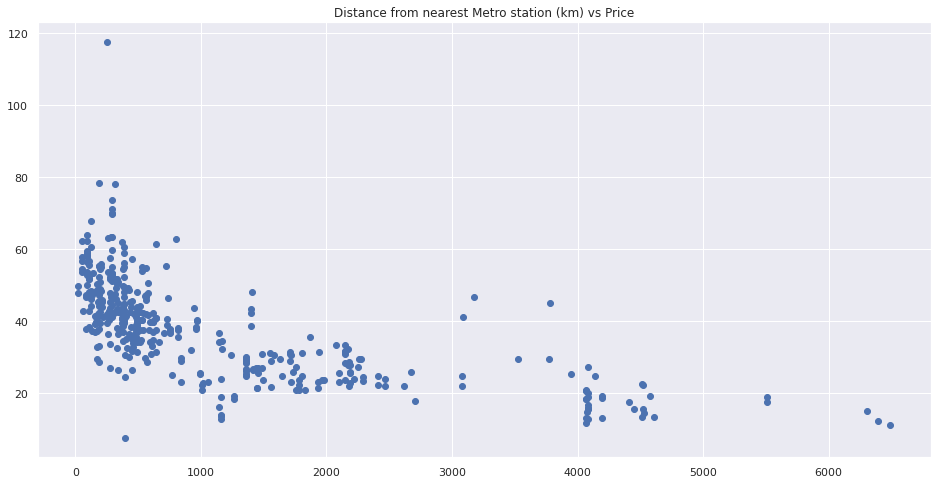

In [ ]:
plt.scatter(df['Distance from nearest Metro station (km)'],df['House price of unit area'])
plt.title('Distance from nearest Metro station (km) vs Price')

Text(0.5, 1.0, 'location vs Price')

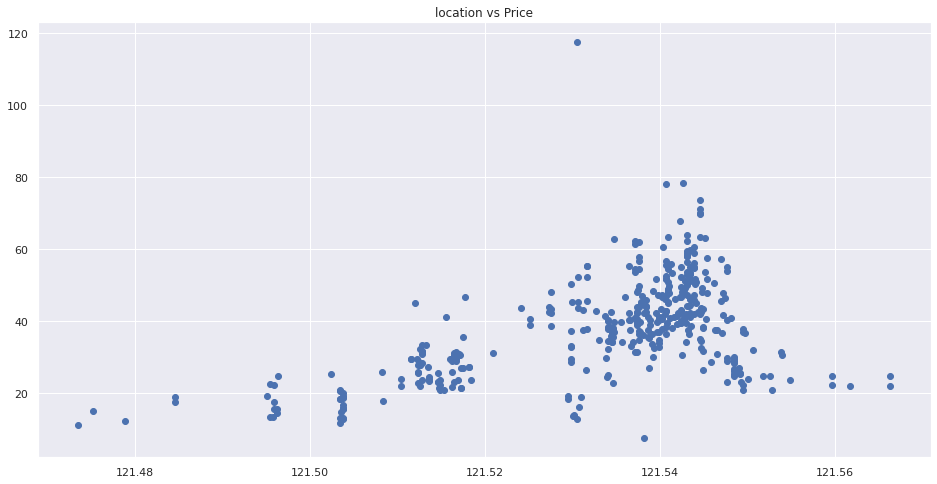

In [ ]:
plt.scatter(df['longitude'],df['House price of unit area'])
plt.title('location vs Price')

In [ ]:
x=df.drop("House price of unit area",axis=1)
y=df["House price of unit area"]

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 11.539930
Best score using built-in LassoCV: 0.486874


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

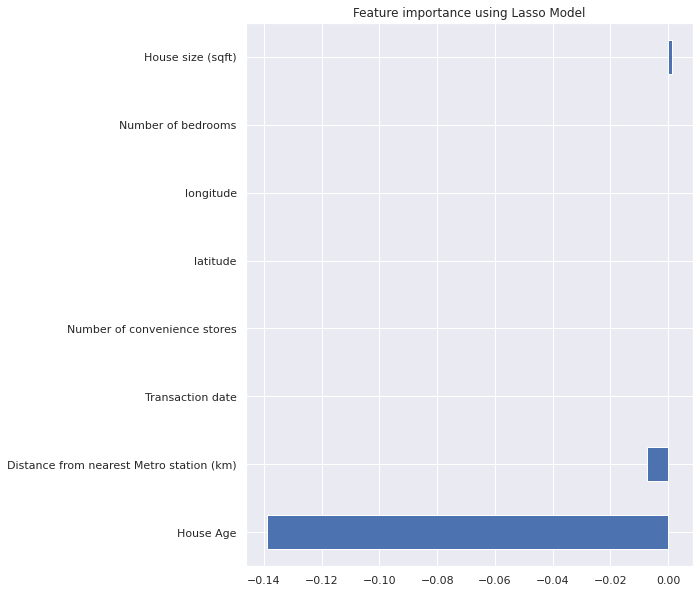

In [ ]:
imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
df=df.drop(['Transaction date','Number of bedrooms','Number of convenience stores'],axis=1)

In [ ]:
df.head()

,House Age,Distance from nearest Metro station (km),latitude,longitude,House size (sqft),House price of unit area
0,32.0,84.87882,24.98298,121.54024,575,37.9
1,19.5,306.59470,24.98034,121.53951,1240,42.2
2,13.3,561.98450,24.98746,121.54391,1060,47.3
3,13.3,561.98450,24.98746,121.54391,875,54.8
4,5.0,390.56840,24.97937,121.54245,491,43.1


In [ ]:
x=df.drop("House price of unit area",axis=1)
y=df["House price of unit area"]

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10,random_state =2)

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_test,y_test)

0.5640903805007162

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [ ]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [ ]:
clf.score(x_test,y_test)

0.8279520735485772